In [61]:
import pandas as pd

In [62]:
community_health_evaluations = pd.read_csv("/content/drive/MyDrive/Community health evaluation dataset/community_health_evaluation_dataset.csv")

In [63]:
data = community_health_evaluations

1. Exploratory Data Analysis


*   Data Summary: Describing each feature, examining distributions, and looking for missing or anomalous values
*   Descriptive Statistics: Calculating means, medians, variances, etc., for numerical columns and frequency counts for categorical columns(e.g., Service Type, SES, Gender.

* Correlations: Generating Correlation matrix for numerical features to uncover relationships, particulalt with patient satisfaction and quality of life of life score.  
*  Visualizations:
    - Histograms and box plots for distributions.
    - Scatter plots for relationships (e.g., Age vs. Patient - Satisfaction).
    - Heatmap for correlation matrix.
2. Preprocessing
Encoding: Convert categorical features (Gender, SES, Service Type, EMG Activity) using one-hot or label encoding.
Scaling: Standardize numerical features like Age, Step Frequency, and Stride Length for model compatibility.
Feature Engineering: Create new features if necessary, such as aggregating Step Frequency and Stride Length for activity level.    
3. Model Selection and Training with Hyperparameter Tuning
Train-Test Split: Split the dataset for training and testing.
Modeling Approaches: Implement multiple models for classification/regression based on your predictive targets, such as:
Linear Models: Linear Regression (if predicting continuous variables), Logistic Regression.
Tree-Based Models: Decision Trees, Random Forests, and Gradient Boosting.
SVM: Support Vector Machine.
K-Nearest Neighbors (KNN)
Neural Networks: Simple neural network architectures if computational resources permit.
Hyperparameter Tuning: Use GridSearchCV or RandomizedSearchCV to find optimal hyperparameters for each model.
Model Evaluation Metrics: Use appropriate metrics (e.g., accuracy, precision, recall for classification; R², MAE for regression).    
4. Model Comparison and Selection
Compare models based on their performance metrics and evaluate using cross-validation.
Select the best-performing model based on metrics and interpretability.
5. Visualization of Model Impacts
Before Prediction: Visualize data distributions, correlations, and feature importance scores.
After Prediction: Show residuals, actual vs. predicted plots, and feature impact.
Model-specific Visuals: For tree-based models, create tree diagrams and feature importances. For linear models, examine coefficients.
6. Dashboard and Final Report
Develop a dashboard (e.g., in Power BI or a web app with Streamlit) to present analysis, predictions, and visualizations.
Provide comprehensive documentation explaining the workflow, model comparisons, and implications of predictions on patient satisfaction and quality of life.








In [64]:
data.head()

,Participant ID,Age,Gender,SES,Service Type,Visit Frequency,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),EMG Activity,Patient Satisfaction (1-10),Quality of Life Score
0,1,56,F,4,Rehab,Weekly,85,0.54,17.99,Low,1,57
1,2,69,M,1,Preventive,Yearly,80,0.70,13.05,Moderate,8,94
2,3,46,M,4,Rehab,Yearly,81,0.57,29.85,Moderate,4,66
3,4,32,F,1,Consultation,Weekly,66,0.78,28.54,Moderate,9,66
4,5,60,M,3,Preventive,Weekly,73,0.84,20.80,High,5,98


# 1. Exploratory Data Analysis (EDA)

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data.info)
print(data.describe(include='all'))
print(data.isnull().sum())

<bound method DataFrame.info of      Participant ID  Age Gender  SES  Service Type Visit Frequency  \
0                 1   56      F    4         Rehab          Weekly   
1                 2   69      M    1    Preventive          Yearly   
2                 3   46      M    4         Rehab          Yearly   
3                 4   32      F    1  Consultation          Weekly   
4                 5   60      M    3    Preventive          Weekly   
..              ...  ...    ...  ...           ...             ...   
342             343   24      M    3    Preventive          Yearly   
343             344   20      F    3         Rehab         Monthly   
344             345   34      F    3    Preventive          Yearly   
345             346   50      M    3    Preventive          Weekly   
346             347   65      F    2         Rehab          Yearly   

     Step Frequency (steps/min)  Stride Length (m)  Joint Angle (°)  \
0                            85               0.54      

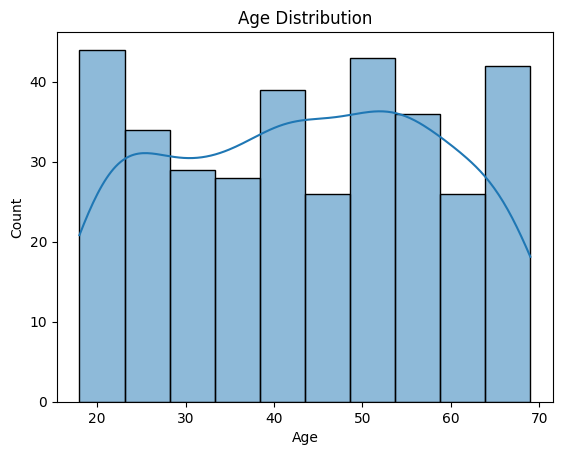

In [66]:
#Visualizations
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

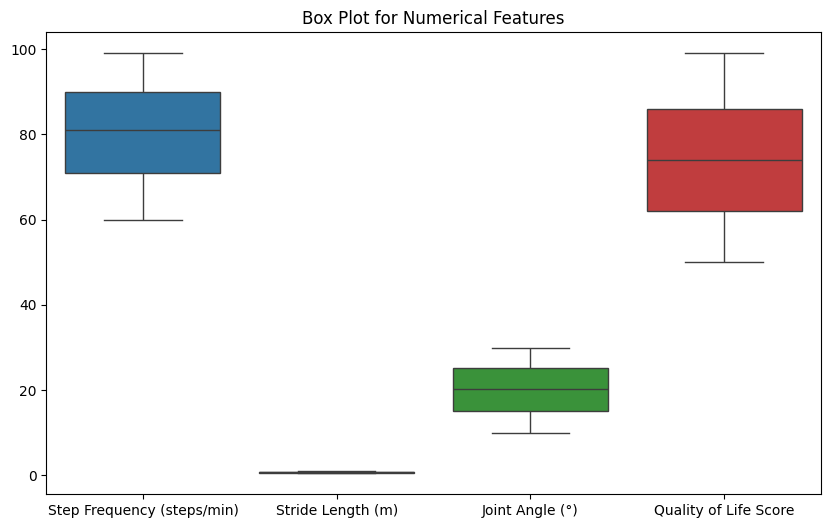

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Step Frequency (steps/min)", "Stride Length (m)", "Joint Angle (°)", "Quality of Life Score"]])
plt.title("Box Plot for Numerical Features")
plt.show()

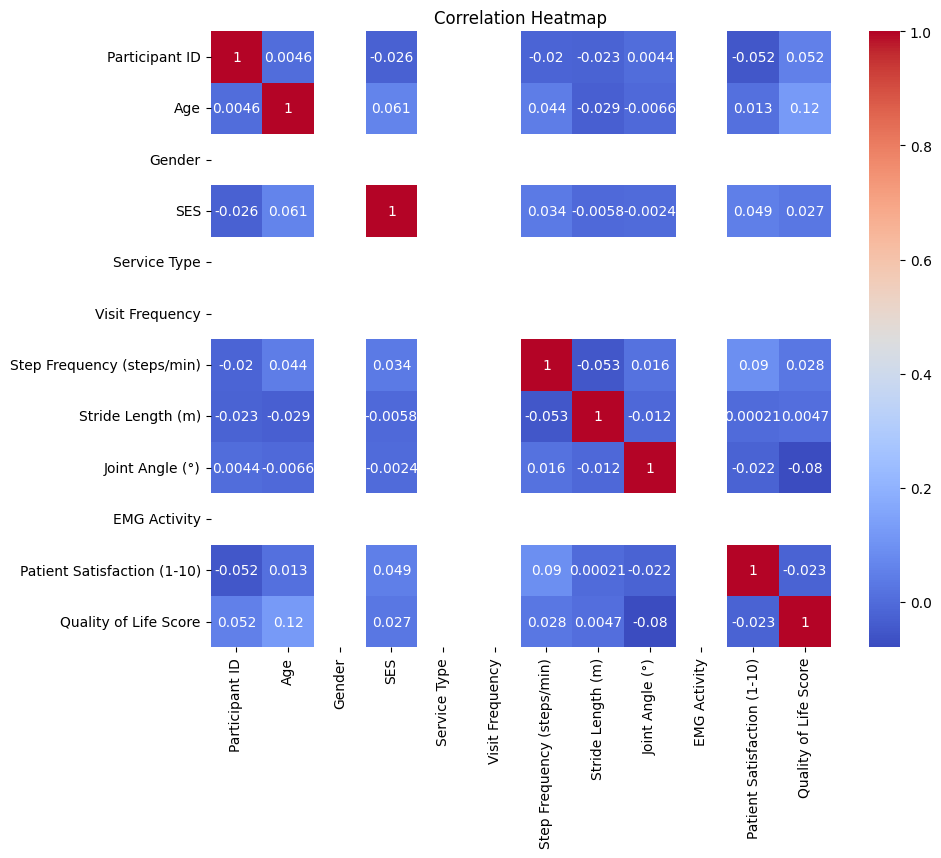

In [68]:
#Correlation Heatmap
#Converting relevant columns to numeric, handling errors
for column in data.columns:
  if data[column].dtype == 'object':
    try:
      data[column] = pd.to_numeric(data[column], errors = 'coerce')
    except ValueError:
      print(f"Column '{column}' could not be converted to numeric.")
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. Preprocessing
Prepare the data for model training by encoding categorical variables, scaling, and splitting into training and testing sets.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Encoding Categorical Variable
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['SES'] = LabelEncoder().fit_transform(data['SES'])
data['Service Type'] = LabelEncoder().fit_transform(data['Service Type'])
data['EMG Activity'] = LabelEncoder().fit_transform(data['EMG Activity'])

#Defining target and features
X = data.drop(['Patient Satisfaction (1-10)', 'Quality of Life Score', 'Participant ID'], axis=1)
y = data['Quality of Life Score']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaled Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# 3. Handling Missing Values
We'll use simple imputer for handling missing values

In [70]:
from sklearn.impute import SimpleImputer
#Imputation using SimpleImputer with strategy = 'means'
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


# 4. Model Selection and Hyperparameter Tuning
We'll use multiple models and visualize them to understand their strengths.

Linear Regression Cross-Validation R2 Scores: -0.020879521953928303


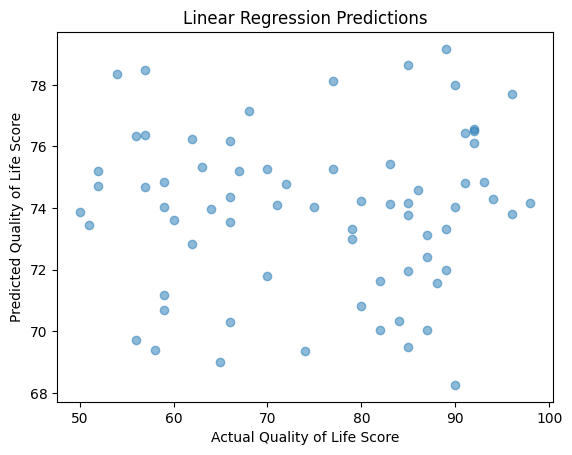

In [71]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

#Training the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Cross validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
print("Linear Regression Cross-Validation R2 Scores:", cv_scores.mean())

#Predictions and visualization
y_pred_lr = lr_model.predict(X_test)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Quality of Life Score")
plt.ylabel("Predicted Quality of Life Score")
plt.title("Linear Regression Predictions")
plt.show()

Best Random Forest Parameters: {'max_depth': 5, 'n_estimators': 200}


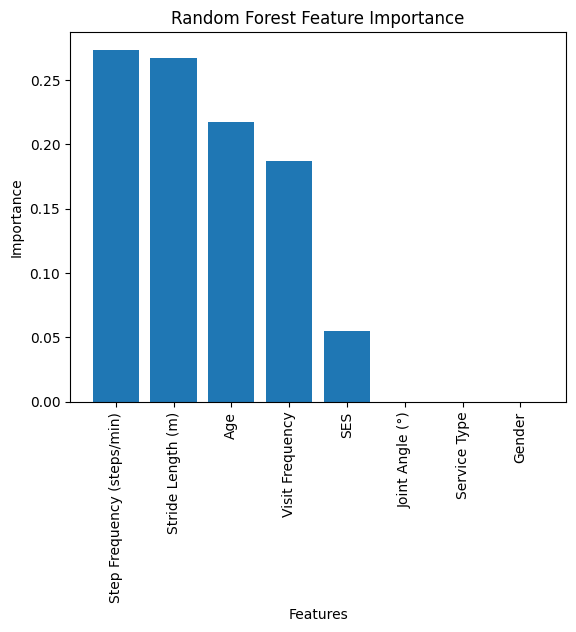

In [72]:
#Random Forest with Hyperparameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Hyperparameter Tuning
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Best Model and Prediction
best_rf = grid_search.best_estimator_
print("Best Random Forest Parameters:", grid_search.best_params_)

y_pred_rf = best_rf.predict(X_test)

#Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Use the shape of importances for x-axis range
plt.bar(range(importances.shape[0]), importances[indices])


plt.xticks(range(importances.shape[0]), X.columns[indices], rotation=90)

plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

Random Forest R^2 Score: -0.16863479965799644


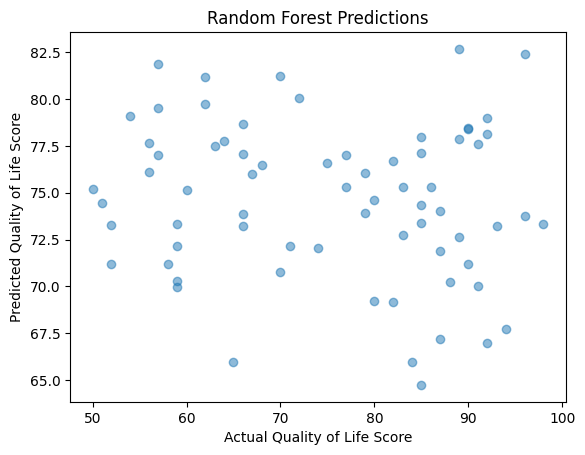

In [73]:
rf_best_model = RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)
rf_best_model.fit(X_train, y_train)
y_pred_rf = rf_best_model.predict(X_test)
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Quality of Life Score")
plt.ylabel("Predicted Quality of Life Score")
plt.title("Random Forest Predictions")
plt.show()

Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}


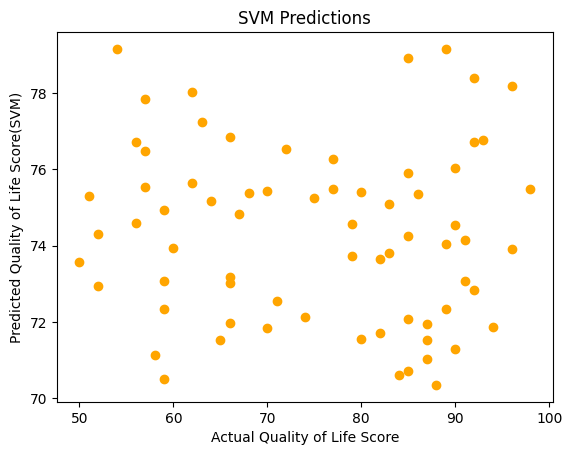

In [74]:
#Support Vector Machines(SVM) with Hyperparameter Tuning
from sklearn.svm import SVR
#Hyperparameter tuning for SVM
svm = SVR()
param_grid_svm = {'C':[0.1,1,10], 'kernel':['linear', 'rbf']}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='r2')
grid_search_svm.fit(X_train, y_train)

#Best Model and prediction
best_svm = grid_search_svm.best_estimator_
print("Best SVM Parameters:", grid_search_svm.best_params_)

y_pred_svm = best_svm.predict(X_test)

#Visualization of SVM Predictions
plt.scatter(y_test, y_pred_svm, color='orange')
plt.xlabel("Actual Quality of Life Score")
plt.ylabel("Predicted Quality of Life Score(SVM)")
plt.title("SVM Predictions")
plt.show()

SVM R^2 Score: -0.055622913902861226


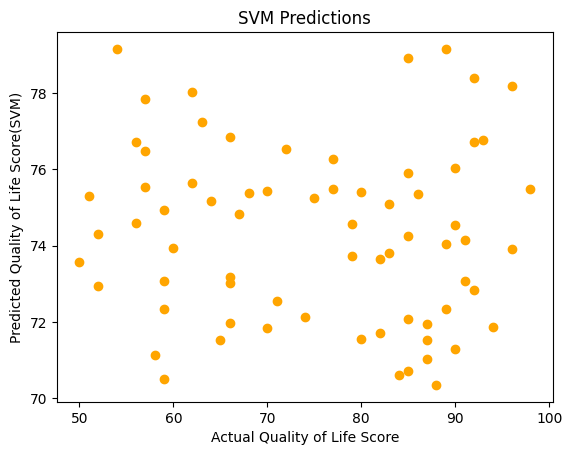

In [75]:
svm_best_model = SVR(C=1, kernel='rbf')
svm_best_model.fit(X_train, y_train)
y_pred_svm = svm_best_model.predict(X_test)
print("SVM R^2 Score:", r2_score(y_test, y_pred_svm))
plt.scatter(y_test, y_pred_svm, color='orange')
plt.xlabel("Actual Quality of Life Score")
plt.ylabel("Predicted Quality of Life Score(SVM)")
plt.title("SVM Predictions")
plt.show()

In [76]:
#Model Comparison and Selection
#Comparing models based on R2 and Mean Absolute Error(MAE) to determine the best fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Evaluation Function
def evaluate_model(name, y_true, y_pred):
  r2 = r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  print(f"{name} - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

#Evaluating Models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("SVM", y_test, y_pred_svm)

Linear Regression - R2: -0.0351, MAE: 12.7232, MSE: 199.6758, RMSE: 14.1307
Random Forest - R2: -0.1686, MAE: 13.3014, MSE: 225.4342, RMSE: 15.0145
SVM - R2: -0.0556, MAE: 12.7851, MSE: 203.6338, RMSE: 14.2700


# 5. Comprehensive Visualization
For each model, visualize its performance to illustrate how will it fits the data. Here is an example using residual plots

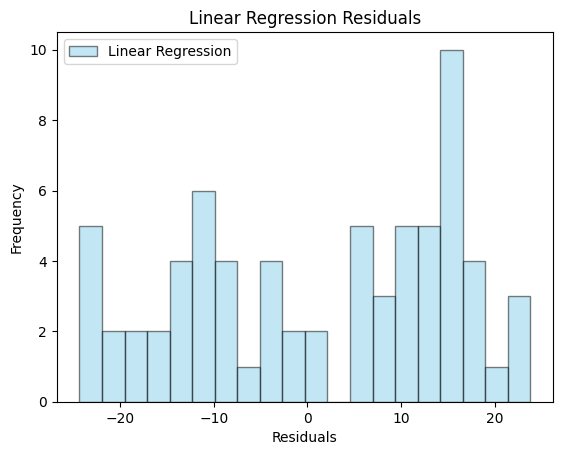

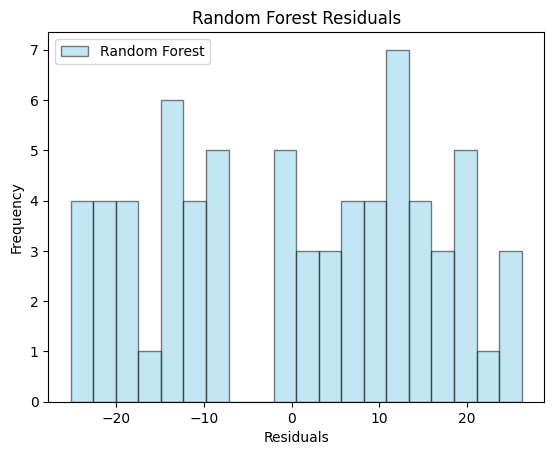

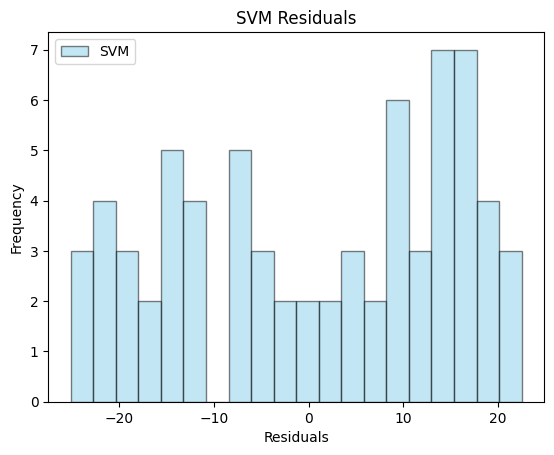

In [77]:
models = {"Linear Regression": y_pred_lr, "Random Forest": y_pred_rf, "SVM": y_pred_svm}
for name, pred in models.items():
  residuals = y_test - pred
  plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.5, label=name)
  plt.title(f"{name} Residuals")
  plt.xlabel("Residuals")
  plt.ylabel("Frequency")
  plt.legend()
  plt.show()

As the r2 scores and rmse values suggests there are many scopes of improvement in the model


# 6. Polynomial Regression with Ridge and Lasso Regularization
To capture non-linear relationships, we’ll first create polynomial features and then fit Ridge and Lasso regression models. Ridge and Lasso add penalties to the model to help manage complex relationships without overfitting.

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline

#Defining degree for polynomial features
degree = 2

#Ridge Regression with poynomial features
ridge_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))

])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

#Evaluating the Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge  = r2_score(y_test, y_pred_ridge)

print(f"Ridge Polynomial Regression - Degree {degree}")
print(f"Ridge Regression - MAE: {mae_ridge:.4f}, MSE: {mse_ridge:.4f}, RMSE: {rmse_ridge:.4f}, R2: {r2_ridge:.4f}")

#Lasso Regression with Polynomial with Polynomial Features
lasso_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree)),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=1.0, max_iter=10000))
])
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

#Evaluating the Lasso model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso  = r2_score(y_test, y_pred_lasso)

print(f"Lasso Polynomial Regression - Degree {degree}")
print(f"Lasso Regression - MAE: {mae_lasso:.4f}, MSE: {mse_lasso:.4f}, RMSE: {rmse_lasso:.4f}, R2: {r2_lasso:.4f}")

Ridge Polynomial Regression - Degree 2
Ridge Regression - MAE: 12.7357, MSE: 224.8523, RMSE: 14.9951, R2: -0.1656
Lasso Polynomial Regression - Degree 2
Lasso Regression - MAE: 12.6156, MSE: 197.3736, RMSE: 14.0490, R2: -0.0232


#  Gradient Boosting Regression
Gradient Boosting works well with tabular data and can capture complex patterns without requiring extensive feature engineering.

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
#Instantiate and fit the gradient boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

#Make predictions
y_pred_gb = gb_model.predict(X_test)

#Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb  = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression")
print(f"Gradient Boosting Regression - MAE: {mae_gb:.4f}, MSE: {mse_gb:.4f}, RMSE: {rmse_gb:.4f}, R2: {r2_gb:.4f}")


Gradient Boosting Regression
Gradient Boosting Regression - MAE: 13.7750, MSE: 276.7865, RMSE: 16.6369, R2: -0.4348


# Best Model Analysis
Among the three models, Lasso Polynomial Regression with a degree of 2 has the lowest MAE, MSE, and RMSE values, as well as the least negative R² value. This suggests that it performs better than the Ridge and Gradient Boosting models in terms of prediction error and variance explanation.

# Conclusion: Lasso Polynomial Regression as the Best Model
Given that Lasso Polynomial Regression has achieved the best results, you can proceed with this model for prediction tasks on this dataset.

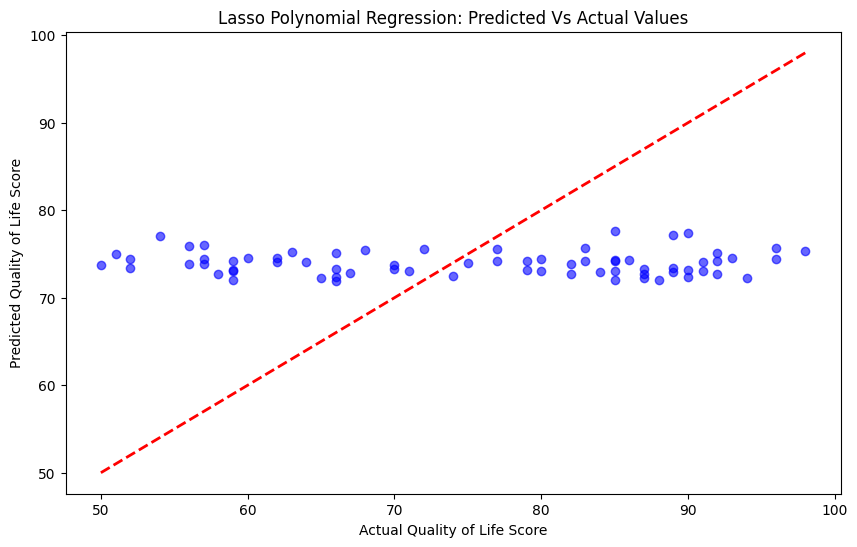

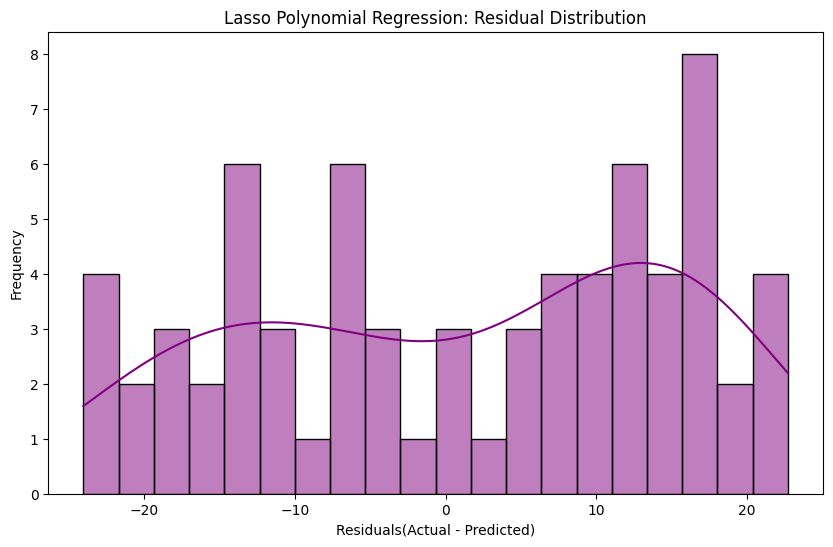

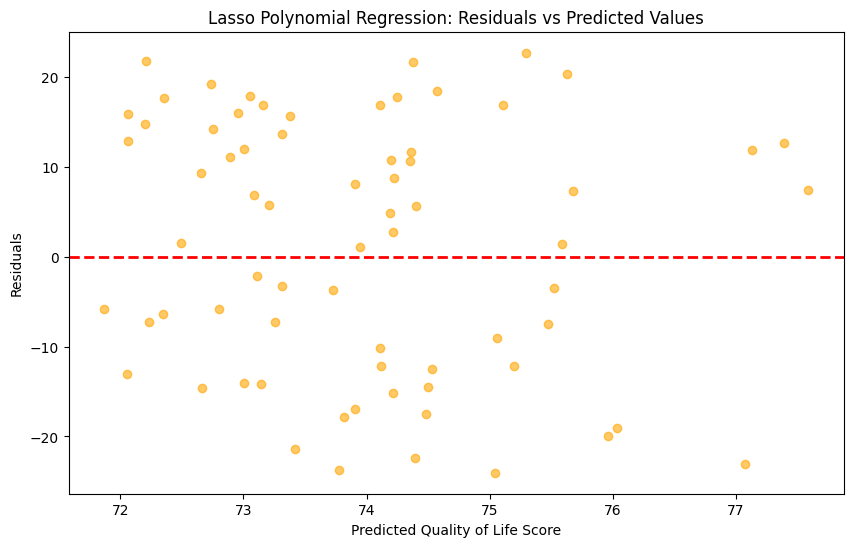

In [80]:
# Predicted Vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Quality of Life Score')
plt.ylabel('Predicted Quality of Life Score')
plt.title('Lasso Polynomial Regression: Predicted Vs Actual Values')
plt.show()
# Residual plot to analyze the performace of the model
residuals = y_test - y_pred_lasso
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title('Lasso Polynomial Regression: Residual Distribution')
plt.xlabel('Residuals(Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

#Residuals vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso, residuals, color='orange', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Quality of Life Score')
plt.ylabel('Residuals')
plt.title('Lasso Polynomial Regression: Residuals vs Predicted Values')
plt.show()

# Predicted vs Actual Plot for Lasso Polynomial Regression:
Description: This scatter plot compares the predicted Quality of Life Score (y-axis) against the actual values (x-axis). The diagonal red line represents the ideal scenario where predictions perfectly match the actual values (i.e., a perfect model where all points lie on this line).
# Analysis:
- The points are clustered around 70-80 on the y-axis, showing that most predictions are around this range regardless of the actual Quality of Life score.
- There is a significant underfitting issue here. The model fails to capture the relationship between actual and predicted values effectively, as the data points deviate considerably from the red dashed line.
- This indicates that the model is overly simplistic or lacks the capacity to fit the data adequately, despite using polynomial features.
# Residual Distribution Plot:
- Description: This histogram shows the distribution of residuals (the difference between actual and predicted values), along with a fitted curve representing the distribution's shape.
# Analysis:
- The residuals are widely spread, ranging from approximately -25 to +25, suggesting that the predictions frequently deviate by significant margins from the actual values.
- The distribution is fairly symmetric, but the spread is large, implying that the model's errors are consistent in magnitude but can be large in both directions (underestimation and overestimation).
- The histogram shows a high frequency of errors around both -10 and +10, which indicates that many predictions are off by a significant amount.

# Polynoimal Feature Engineering

In [81]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [1, 2, 3, 4, 5]
lasso_alpha = 0.01
results = []
for degree in degrees:
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  #Initializing Lasso Regression with cross validation
  lasso = Lasso(alpha=lasso_alpha, max_iter=10000)
  lasso.fit(X_train_poly, y_train)

  #Predictions and performance matrix
  y_pred_lasso = lasso.predict(X_test_poly)
  mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
  mse_lasso = mean_squared_error(y_test, y_pred_lasso)
  rmse_lasso = np.sqrt(mse_lasso)
  r2_lasso  = r2_score(y_test, y_pred_lasso)
  results.append([degree, mae_lasso, mse_lasso, rmse_lasso, r2_lasso])

#Display the results for comparison
for result in results:
  print(f"Degree {result[0]} - MAE: {result[1]:.4f}, MSE: {result[2]:.4f}, RMSE: {result[3]:.4f}, R2: {result[4]:.4f}")


Degree 1 - MAE: 12.7220, MSE: 199.6023, RMSE: 14.1281, R2: -0.0347
Degree 2 - MAE: 12.7331, MSE: 224.3776, RMSE: 14.9792, R2: -0.1632
Degree 3 - MAE: 15.7602, MSE: 377.6072, RMSE: 19.4321, R2: -0.9575
Degree 4 - MAE: 21.2562, MSE: 1198.5024, RMSE: 34.6194, R2: -5.2130
Degree 5 - MAE: 38.2934, MSE: 4139.4791, RMSE: 64.3388, R2: -20.4588


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.973e+01, tolerance: 5.374e+00
  model = cd_fast.enet_coordinate_descent(


In [82]:


# Define hyperparameters to tune
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_poly, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'alpha': 100, 'max_iter': 1000}
Best CV Score: -0.006077749802451527


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.527e+03, tolerance: 5.374e+00
  model = cd_fast.enet_coordinate_descent(


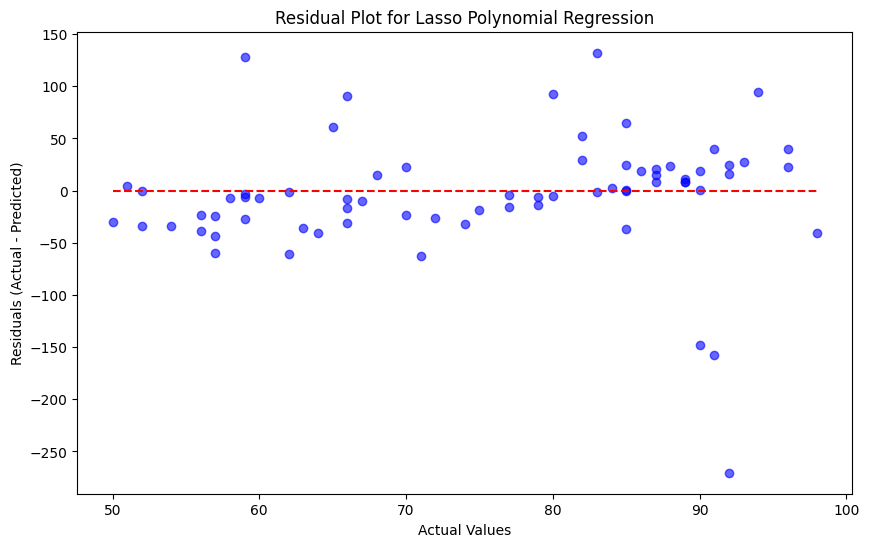

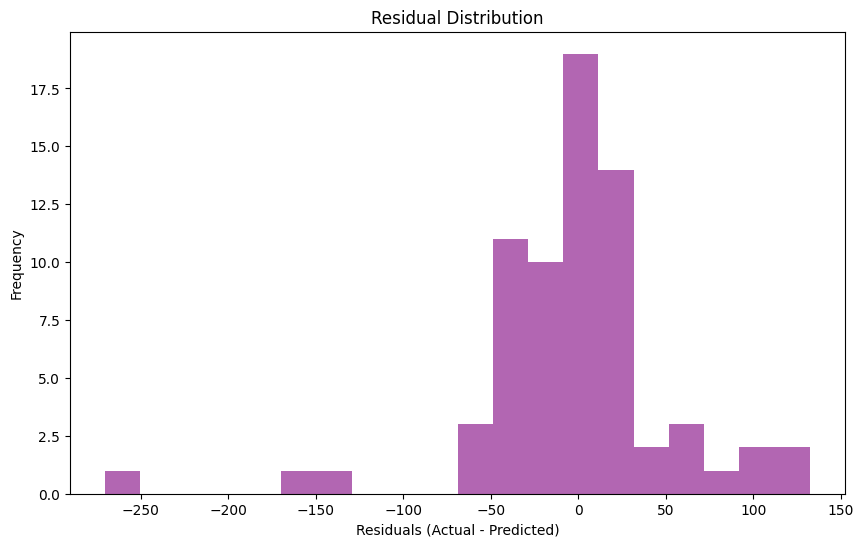

In [83]:
lasso = Lasso(alpha=0.01, max_iter=1000)
lasso.fit(X_train_poly, y_train)
# Predict on the test set
y_pred = lasso.predict(X_test_poly)

# Residuals
residuals = y_test - y_pred

# Plot Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color="blue", alpha=0.6)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='dashed')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Lasso Polynomial Regression')
plt.show()

# Plot Residual Distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='purple', alpha=0.6)
plt.title('Residual Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


# Health Insights and Statistical Findings
- This part focuses on drawing actionable insights from the data to identify critical factors affecting Quality of Life Score and Patient Satisfaction.

- Age and Quality of Life: Analyzing age and Quality of Life Score can reveal how different age groups are impacted by various health services. For instance, if older participants show lower scores, initiatives could prioritize improved services or preventive care for aging populations.

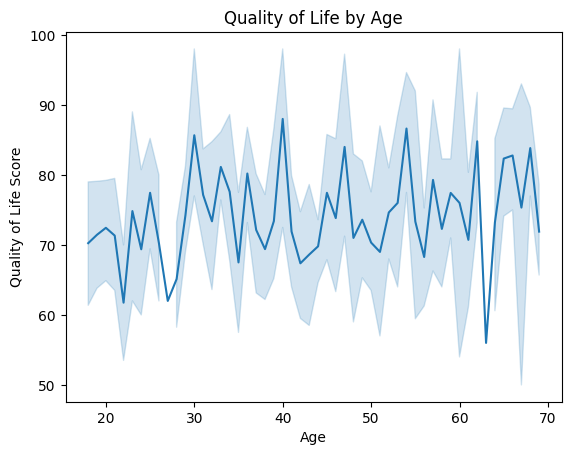

In [89]:
sns.lineplot(x='Age', y='Quality of Life Score', data=data)
plt.title("Quality of Life by Age")
plt.show()

# Service Type Effectiveness: By examining the impact of different service types (Rehab, Preventive, Consultation), we can identify the most beneficial service type in terms of increasing Quality of Life and Satisfaction. If rehab services significantly increase quality scores, expanding them could benefit public health.

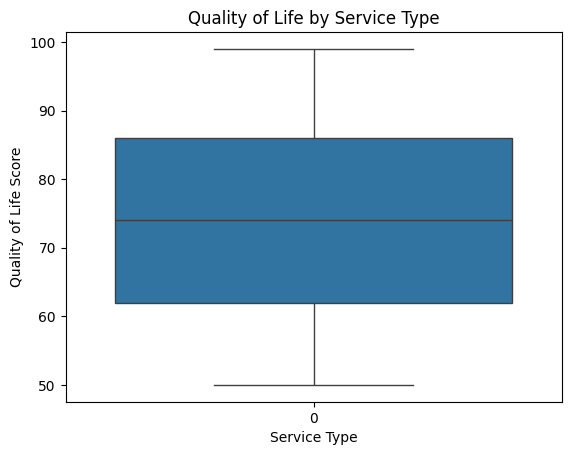

In [90]:
sns.boxplot(x='Service Type', y='Quality of Life Score', data=data)
plt.title("Quality of Life by Service Type")
plt.show()

Step Frequency & Stride Length: Physical activity metrics like step frequency and stride length give insight into how active patients are. We can analyze how these factors correlate with Quality of Life and Satisfaction scores, offering motivation for personalized physical activity programs.

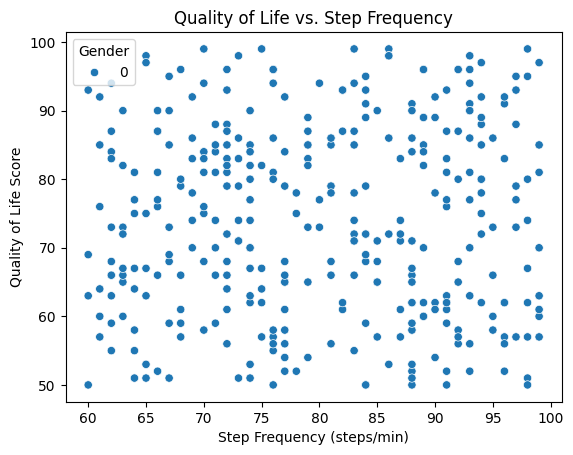

In [91]:
sns.scatterplot(x='Step Frequency (steps/min)', y='Quality of Life Score', hue='Gender', data=data)
plt.title("Quality of Life vs. Step Frequency")
plt.show()


Predictive Modeling for Health Recommendations
By creating predictive models, we can identify people at risk of lower Quality of Life or Satisfaction based on their profile and suggest timely interventions. Here’s a suggested modeling focus:

Patient Satisfaction Prediction: Building a model that predicts Patient Satisfaction based on factors like Age, SES, Service Type, and physical activity metrics could help healthcare providers personalize service and target individuals who might benefit from additional support.

Quality of Life Prediction: Similarly, a model predicting Quality of Life Score provides valuable insights into which patients might be at risk of lower scores. For example, lower SES groups with low activity levels might benefit from targeted health programs.

Example Code for Model to Predict Satisfaction

In [92]:
# Assuming 'Satisfaction' as a binary (high/low) label based on a threshold
data['Satisfaction Level'] = data['Patient Satisfaction (1-10)'].apply(lambda x: 'High' if x >= 7 else 'Low')

# Preparing the data for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = data.drop(['Satisfaction Level', 'Patient Satisfaction (1-10)', 'Quality of Life Score'], axis=1)
y = data['Satisfaction Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predictions and report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.45      0.20      0.28        25
         Low       0.66      0.87      0.75        45

    accuracy                           0.63        70
   macro avg       0.56      0.53      0.51        70
weighted avg       0.59      0.63      0.58        70



1.  Community Health Recommendations
    Using insights from the data, we can develop actionable recommendations for public health improvements:

2. Enhancing Physical Activity Programs: If physical metrics (Step Frequency,
   Stride Length) strongly correlate with Quality of Life, local governments could promote programs like free exercise classes or walking groups, especially for seniors or lower SES groups who may need support in staying active.

3. Personalized Healthcare Services: With data on Satisfaction and Quality of
   Life, healthcare providers can tailor consultations, rehab, and preventive care to address specific needs. For example:

   Rehab Programs can be prioritized for people with low satisfaction or quality scores to prevent deterioration.
   Preventive Services could be promoted for younger age groups as an investment in future health.
4. Societal Benefits and Policy Suggestions
These data-driven strategies can inform policy-makers and healthcare providers to allocate resources where they're most needed:

 Targeted Interventions for Lower SES Groups: If the analysis shows that lower SES correlates with lower Quality of Life, policy recommendations could include subsidies for medical visits, affordable rehab services, or free physical activity initiatives.

 Health Monitoring and Outreach Programs: Regular health check-ins could benefit people with lower satisfaction or quality scores, identified through predictive modeling, enabling proactive outreach by healthcare organizations.

5. Creating Awareness and Educational Campaigns
Findings from this dataset can be shared with the community to create awareness. Campaigns focused on the importance of physical activity, preventive care, and regular consultations can help promote healthier habits.

# 1. Health Insights and Statistical Findings

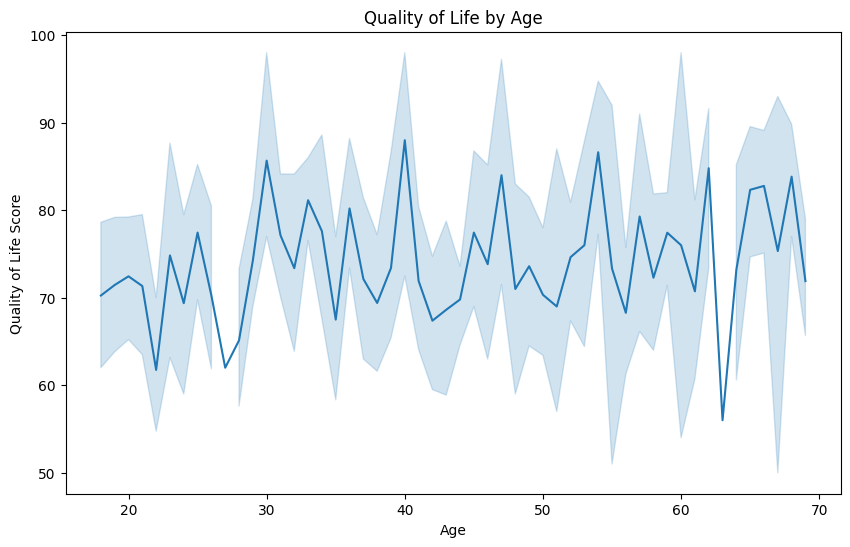

In [97]:
# Line plot for Quality of Life by Age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Quality of Life Score', data=data)
plt.title("Quality of Life by Age")
plt.xlabel("Age")
plt.ylabel("Quality of Life Score")
plt.show()


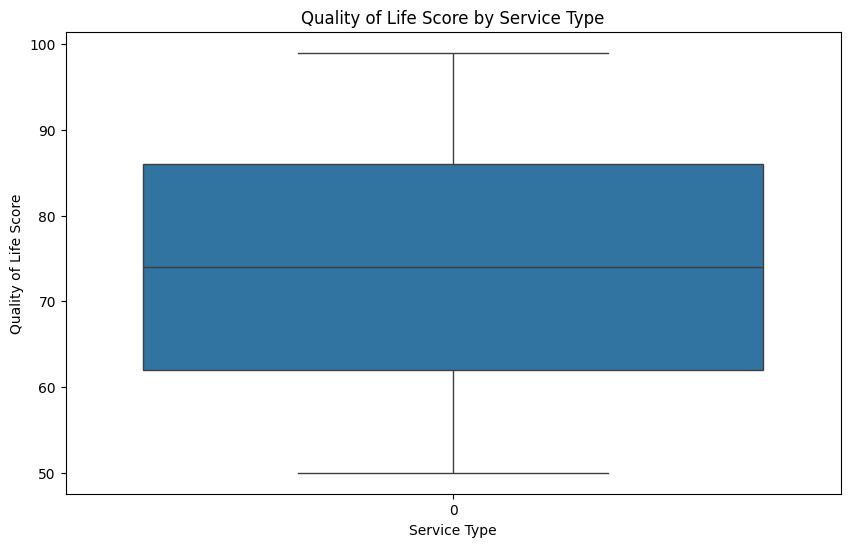

In [98]:
# Service effectiveness
# Box plot to analyze Quality of Life by Service Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Service Type', y='Quality of Life Score', data=data)
plt.title("Quality of Life Score by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Quality of Life Score")
plt.show()


# Predictive Modeling for Health Recommendations
We'll train two models to predict Patient Satisfaction Level and Quality of Life Score. The Satisfaction Level will be a classification model, and the Quality of Life Score a regression model.

Predictive Modeling: Patient Satisfaction Level

Classification Report for Patient Satisfaction Level:
              precision    recall  f1-score   support

        High       0.44      0.16      0.24        25
         Low       0.66      0.89      0.75        45

    accuracy                           0.63        70
   macro avg       0.55      0.52      0.50        70
weighted avg       0.58      0.63      0.57        70



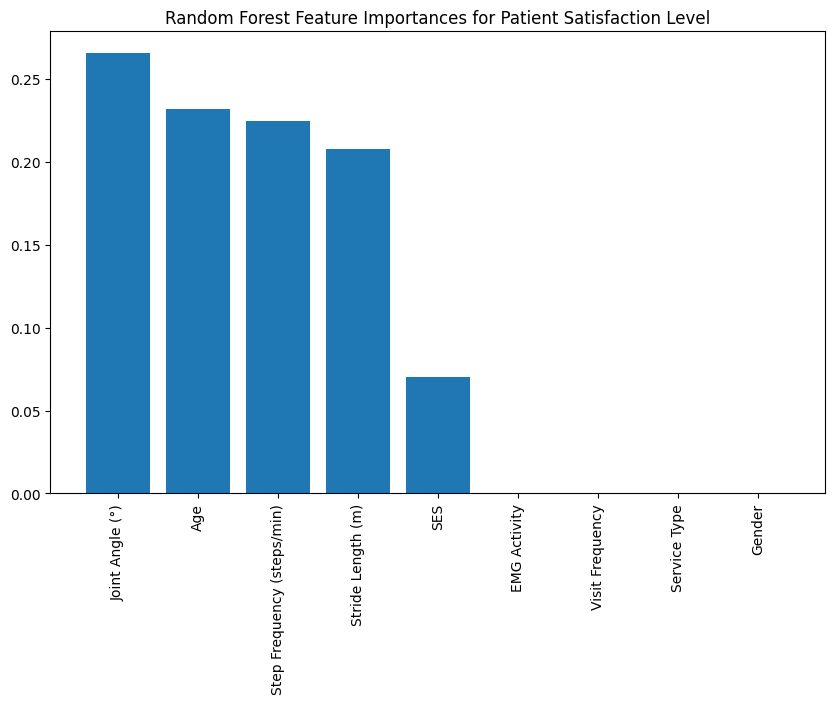

In [99]:
# Create a binary label for Patient Satisfaction Level
data['Satisfaction Level'] = data['Patient Satisfaction (1-10)'].apply(lambda x: 'High' if x >= 7 else 'Low')

# Define features and target
X_satisfaction = data.drop(['Satisfaction Level', 'Patient Satisfaction (1-10)', 'Quality of Life Score', 'Participant ID'], axis=1)
y_satisfaction = data['Satisfaction Level']

# Train-test split
X_train_satisfaction, X_test_satisfaction, y_train_satisfaction, y_test_satisfaction = train_test_split(X_satisfaction, y_satisfaction, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_satisfaction, y_train_satisfaction)

# Predictions and evaluation
y_pred_satisfaction = clf.predict(X_test_satisfaction)
print("Classification Report for Patient Satisfaction Level:")
print(classification_report(y_test_satisfaction, y_pred_satisfaction))
# Feature Importance Plot
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_satisfaction.shape[1]), importances[indices])
plt.xticks(range(X_satisfaction.shape[1]), X_satisfaction.columns[indices], rotation=90)
plt.title("Random Forest Feature Importances for Patient Satisfaction Level")
plt.show()


# Predictive Modeling: Quality of Life Score

R2 Score: -0.19671602437081392
Mean Absolute Error: 13.447285714285716


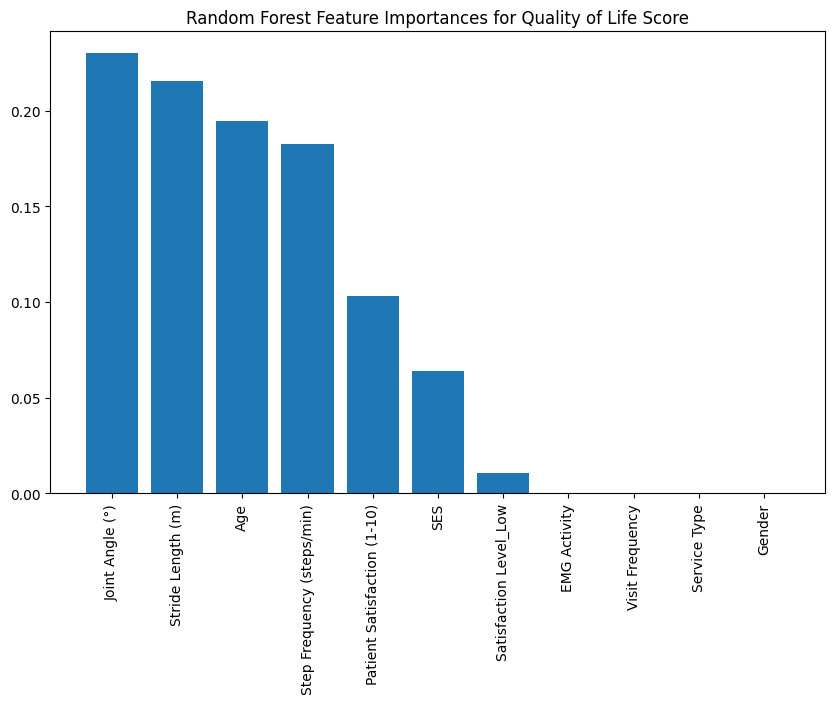

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
X_quality = data.drop(['Quality of Life Score', 'Participant ID'], axis=1)
y_quality = data['Quality of Life Score']
# Convert 'Satisfaction Level' to numerical representation using one-hot encoding
X_quality = pd.get_dummies(X_quality, columns=['Satisfaction Level'], drop_first=True)
# drop_first=True is used to avoid multicollinearity

# Train-test split
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X_quality, y_quality, test_size=0.2, random_state=42)

# Train model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_quality, y_train_quality)


# Train-test split
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X_quality, y_quality, test_size=0.2, random_state=42)

# Train model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_quality, y_train_quality)

# Predictions and evaluation
y_pred_quality = rf_regressor.predict(X_test_quality)
print("R2 Score:", r2_score(y_test_quality, y_pred_quality))
print("Mean Absolute Error:", mean_absolute_error(y_test_quality, y_pred_quality))
# Feature Importance Plot for Quality of Life Prediction
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_quality.shape[1]), importances[indices])
plt.xticks(range(X_quality.shape[1]), X_quality.columns[indices], rotation=90)
plt.title("Random Forest Feature Importances for Quality of Life Score")
plt.show()


3. Community Health Recommendations
Based on model outputs and feature importance, we can generate insights such as:

   Physical Activity Programs: If step frequency significantly impacts Quality of Life, recommend physical activity initiatives, especially targeting lower SES groups or older age groups with limited activity.
Service Type Optimization: Using satisfaction scores, allocate resources to more effective service types.
No code is required here, but these insights should be documented in a report with evidence from feature importance plots.

4. Creating Awareness and Educational Campaigns
   Summarize findings, sharing trends with community health centers to inform campaigns. For example:

   Preventive Care for Young Adults: If younger age groups show benefits from preventive care, encourage early health screenings.

Final Dashboard Visualization and Report
For presentation, use a tool like Streamlit or Power BI to create an interactive dashboard that showcases:

Demographic Analysis: Age, SES, and service type distributions.
Predictive Insights: Visualize actual vs. predicted Quality of Life and Satisfaction scores.
Model Explanations: Feature importance for both models, allowing stakeholders to understand how specific factors impact health outcomes.

In [104]:

import streamlit as st
import plotly.express as px

# Example Streamlit app structure
st.title("Community Health Evaluation Dashboard")
st.header("Demographic Insights")

# Age distribution plot
fig = px.histogram(data, x='Age', title="Age Distribution of Participants")
st.plotly_chart(fig)

# Quality of Life vs Step Frequency Scatter Plot
fig2 = px.scatter(data, x='Step Frequency (steps/min)', y='Quality of Life Score', color='Gender')
fig2.update_layout(title="Quality of Life vs Step Frequency")
st.plotly_chart(fig2)

# Feature Importances
st.subheader("Feature Importances for Predictive Models")
st.write("Random Forest Regressor Feature Importance for Quality of Life Score")
st.bar_chart(importances)


2024-10-25 15:04:26.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 15:04:26.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 15:04:26.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 15:04:26.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 15:04:26.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 15:04:26.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 15:04:26.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 15:04:26.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()